1. (50 points) Create a Markov chain on the 2×10 tilings that has the uniform distribution as its stationary
distribution (the rotational walk from class). Verify this using the adjacency matrix, and empirically
using the total variational distance and a sample. Do not use MCMC.
(Hint: include loops, and make the edges undirected. This is too many edges to do by hand, so you
should find a way to generate the Markov chain using code. The hint to the next problem may be
helpful as well)

In [ ]:
import sympy as sp
from sympy import fibonacci
from sympy import eye
import numpy as np
import math


def find_tilings(n):
  tilings = []

  stack = [(0, [])] # [(1, [1]), (3, [0,0,1])]

  i = 0

  while stack:
    i, tiling = stack.pop()

    if i == n:
      tilings.append(tiling)

    if i + 1 <= n:
      stack.append((i + 1, tiling + [1]))

    if i + 2 <= n:
      stack.append((i + 2, tiling + [0,0]))

  return tilings


def check_adj(tiling1, tiling2):
  differnences = []
  for i in range(len(tiling1)):
    if tiling1[i] != tiling2[i]:
      differnences.append(i)
  if len(differnences) == 2:
    j, k = differnences
    if abs(j - k) == 1:
      return True
  return False


def adj_matrix(tilings):
  n = len(tilings)
  adj = np.identity(n, dtype=int)
  for i in range(n):
    for j in range(i + 1, n):
      if check_adj(tilings[i], tilings[j]):
        adj[i][j] = 1
        adj[j][i] = 1
  return adj

def find_prob_matrix(adj_matrix, n):

  k = len(adj_matrix)


  prob_matrix = np.zeros((k, k), dtype=float)
  for i in range(k):
    for j in range(k):
      if adj_matrix[i][j] == 1 and i != j:
        prob_matrix[i][j] = 1 / n
  for i in range(n):
    prob_matrix[i][i] = 1 - (np.sum(prob_matrix[i]))

  return prob_matrix


def find_markov_chain_2byn(n):
  tilings = find_tilings(n)
  adj = adj_matrix(tilings)
  prob_matrix = find_prob_matrix(adj, len(tilings))
  return prob_matrix



mark_chain = find_markov_chain_2byn(10)

print("-----------------------------------------Originating Markov Chain-----------------------------------------")
print(mark_chain)

steady_state = np.linalg.matrix_power(mark_chain, 10000)

print("----------------------------------------------Steady State------------------------------------------------")
print(steady_state)

-----------------------------------------Originating Markov Chain-----------------------------------------
[[0.94382022 0.01123596 0.         ... 0.         0.         0.        ]
 [0.01123596 0.94382022 0.         ... 0.         0.         0.        ]
 [0.         0.         0.95505618 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.92134831 0.         0.01123596]
 [0.         0.         0.         ... 0.         0.91011236 0.01123596]
 [0.         0.         0.         ... 0.01123596 0.01123596 0.8988764 ]]
----------------------------------------------Steady State------------------------------------------------
[[0.01123596 0.01123596 0.01123596 ... 0.01123596 0.01123596 0.01123596]
 [0.01123596 0.01123596 0.01123596 ... 0.01123596 0.01123596 0.01123596]
 [0.01123596 0.01123596 0.01123596 ... 0.01123596 0.01123596 0.01123596]
 ...
 [0.01123596 0.01123596 0.01123596 ... 0.01123596 0.01123596 0.01123596]
 [0.01123596 0.01123596 0.01123596 ... 0.0112

% https://q.uiver.app/#q=WzAsNixbMTIsMywiRVsxLDEsMSwxXSJdLFsxMSw2LCJCWzAsMCwxLDFdIl0sWzExLDExLCJBWzAsMCwwLDBdIl0sWzE0LDUsIkRbMSwxLDAsMF0iXSxbMTQsOSwiQ1sxLDAsMCwxXSJdLFswLDAsIlxcYnVsbGV0Il0sWzAsMSwiIiwwLHsic3R5bGUiOnsiaGVhZCI6eyJuYW1lIjoibm9uZSJ9fX1dLFsxLDIsIiIsMCx7InN0eWxlIjp7ImhlYWQiOnsibmFtZSI6Im5vbmUifX19XSxbMCwzLCIiLDIseyJzdHlsZSI6eyJoZWFkIjp7Im5hbWUiOiJub25lIn19fV0sWzMsMiwiIiwyLHsic3R5bGUiOnsiaGVhZCI6eyJuYW1lIjoibm9uZSJ9fX1dLFswLDQsIiIsMix7InN0eWxlIjp7ImhlYWQiOnsibmFtZSI6Im5vbmUifX19XSxbMCwwLCIiLDAseyJzdHlsZSI6eyJoZWFkIjp7Im5hbWUiOiJub25lIn19fV0sWzMsMywiIiwwLHsic3R5bGUiOnsiaGVhZCI6eyJuYW1lIjoibm9uZSJ9fX1dLFs0LDQsIiIsMCx7InN0eWxlIjp7ImhlYWQiOnsibmFtZSI6Im5vbmUifX19XSxbMSwxLCIiLDAseyJzdHlsZSI6eyJoZWFkIjp7Im5hbWUiOiJub25lIn19fV0sWzIsMiwiIiwwLHsic3R5bGUiOnsiaGVhZCI6eyJuYW1lIjoibm9uZSJ9fX1dXQ==

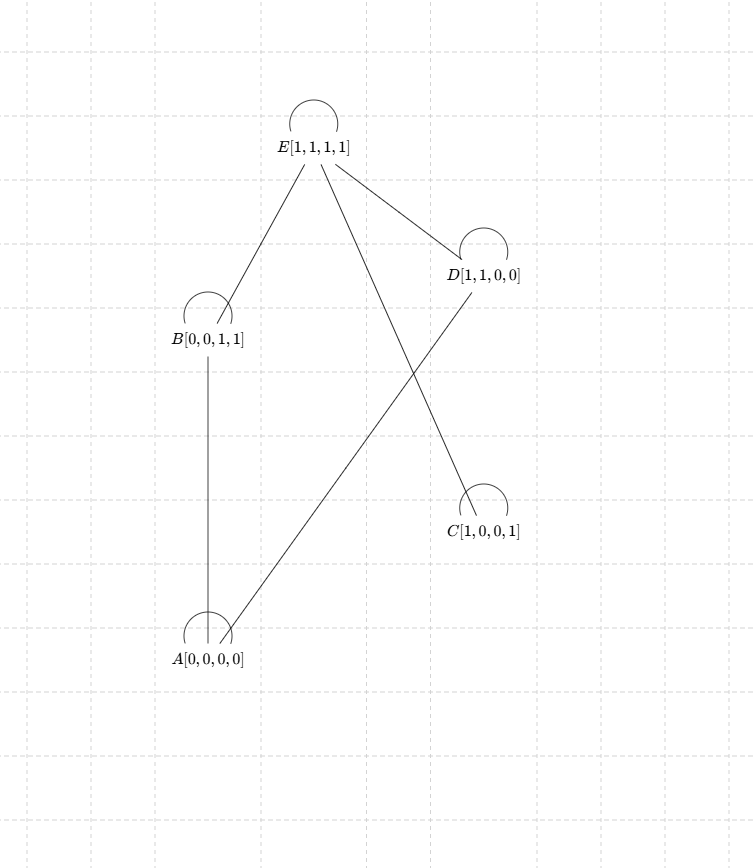

**This is what the $2\times4$ graph of tilings looks like**

https://q.uiver.app/#q=WzAsMTMsWzQsNSwiSFsxLCAxLCAxLCAxLCAxLCAxXSJdLFsyLDgsIkVbMCwwLDEsMSwxLDFdIl0sWzUsOSwiRlsxLDEsMCwwLDEsMV0iXSxbOCw3LCJHWzEsMSwxLDEsMCwwXSJdLFswLDEwLCJCWzAsMCwwLDAsMSwxXSJdLFsyLDExLCJDWzAsMCwxLDEsMCwwXSJdLFs1LDExLCJEWzEsMSwwLDAsMCwwXSJdLFsxLDE1LCJBWzAsMCwwLDAsMCwwXSJdLFsxLDIsIlsxLDAsMCwxLDEsMV0iXSxbNSwyLCJbMSwxLDEsMCwwLDFdIl0sWzQsMCwiWzEsMCwwLDAsMCwxXSJdLFswLDAsIlsxLDAsMCwxLDAsMF0iXSxbNywwLCJbMCwwLDEsMCwwLDFdIl0sWzAsMSwiIiwyLHsic3R5bGUiOnsiaGVhZCI6eyJuYW1lIjoibm9uZSJ9fX1dLFswLDIsIiIsMCx7InN0eWxlIjp7ImhlYWQiOnsibmFtZSI6Im5vbmUifX19XSxbMCwzLCIiLDAseyJzdHlsZSI6eyJoZWFkIjp7Im5hbWUiOiJub25lIn19fV0sWzEsNCwiIiwyLHsic3R5bGUiOnsiaGVhZCI6eyJuYW1lIjoibm9uZSJ9fX1dLFsxLDUsIiIsMix7InN0eWxlIjp7ImhlYWQiOnsibmFtZSI6Im5vbmUifX19XSxbNSwzLCIiLDIseyJjdXJ2ZSI6LTQsInN0eWxlIjp7ImhlYWQiOnsibmFtZSI6Im5vbmUifX19XSxbNCwyLCIiLDIseyJjdXJ2ZSI6LTIsInN0eWxlIjp7ImhlYWQiOnsibmFtZSI6Im5vbmUifX19XSxbMiw2LCIiLDIseyJzdHlsZSI6eyJoZWFkIjp7Im5hbWUiOiJub25lIn19fV0sWzMsNiwiIiwyLHsic3R5bGUiOnsiaGVhZCI6eyJuYW1lIjoibm9uZSJ9fX1dLFs0LDcsIiIsMix7InN0eWxlIjp7ImhlYWQiOnsibmFtZSI6Im5vbmUifX19XSxbNSw3LCIiLDIseyJzdHlsZSI6eyJoZWFkIjp7Im5hbWUiOiJub25lIn19fV0sWzYsNywiIiwxLHsic3R5bGUiOnsiaGVhZCI6eyJuYW1lIjoibm9uZSJ9fX1dLFswLDAsIiIsMix7InN0eWxlIjp7ImhlYWQiOnsibmFtZSI6Im5vbmUifX19XSxbNCw0LCIiLDIseyJzdHlsZSI6eyJoZWFkIjp7Im5hbWUiOiJub25lIn19fV0sWzEsMSwiIiwyLHsic3R5bGUiOnsiaGVhZCI6eyJuYW1lIjoibm9uZSJ9fX1dLFs1LDUsIiIsMix7InN0eWxlIjp7ImhlYWQiOnsibmFtZSI6Im5vbmUifX19XSxbMiwyLCIiLDIseyJzdHlsZSI6eyJoZWFkIjp7Im5hbWUiOiJub25lIn19fV0sWzYsNiwiIiwyLHsic3R5bGUiOnsiaGVhZCI6eyJuYW1lIjoibm9uZSJ9fX1dLFszLDMsIiIsMix7InN0eWxlIjp7ImhlYWQiOnsibmFtZSI6Im5vbmUifX19XSxbNyw3LCIiLDIseyJzdHlsZSI6eyJoZWFkIjp7Im5hbWUiOiJub25lIn19fV0sWzAsOCwiIiwyLHsic3R5bGUiOnsiaGVhZCI6eyJuYW1lIjoibm9uZSJ9fX1dLFswLDksIiIsMix7InN0eWxlIjp7ImhlYWQiOnsibmFtZSI6Im5vbmUifX19XSxbOSwxMCwiIiwyLHsic3R5bGUiOnsiaGVhZCI6eyJuYW1lIjoibm9uZSJ9fX1dLFs4LDEwLCIiLDEseyJzdHlsZSI6eyJoZWFkIjp7Im5hbWUiOiJub25lIn19fV0sWzgsMTEsIiIsMix7InN0eWxlIjp7ImhlYWQiOnsibmFtZSI6Im5vbmUifX19XSxbOSwxMiwiIiwyLHsic3R5bGUiOnsiaGVhZCI6eyJuYW1lIjoibm9uZSJ9fX1dXQ==

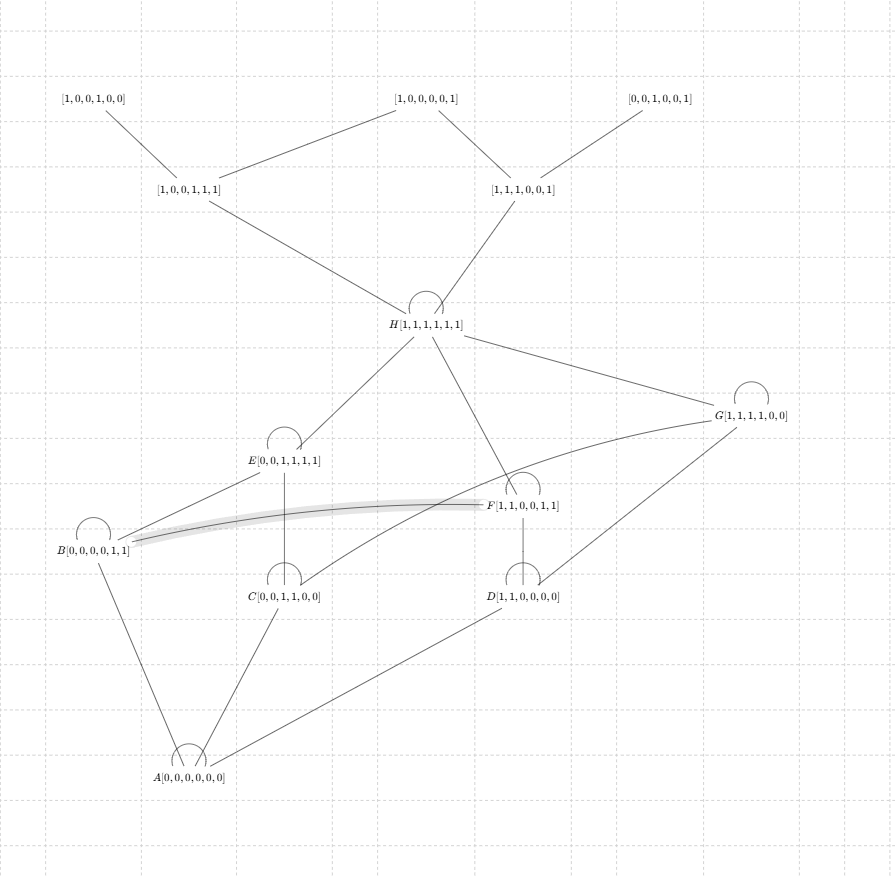


**$2\times6$**

This code uses 4 functions in order to give us our desired result of a uniform steady state associated with our markov chain. I will go over each function:
--------------------------------------------------------------------------------
- find_tilings is the function we use to find all the possible tiling our 2xn board can have. stack will keep adding more and more candidates for a tiling until it runs out of candidates and the candidates have been turned into tilings that are put into the tilings list.

- check_adj is used to find if one tiling can convert to another tiling with one move, or in graph theory terms, if they have an edge between them. for their to be a move between 2 tilings (other than the 'no move' move), 2 things need to be true: exactly 2 entries in each tiling have to be different, and those entries have to be adjacent to one another - the code goes off these 2 rules.

- adj_matrix makes the adjacency matrix of the desired graph of tilings. It does this by checking all combinations of tiling-tiling and using the check_adj function. It changes the adjacency entry if check_adj comes back true.

- make_prob_matrix makes us our desired markov chain. The strategy for finding the probabilities is that we focus on all of the edges that actually change the tilings first. We want to know the maximum number of edges that a node has in our graph, or the amount of states we can go to in the board state that has the max amount of options. The state that has the most options seems to be the state of all vertical dominoes. Intuitively, if we look at a very simple case, a $2\times3$ board and start with all vertical dominoes, we have 2 options: either make the two right dominoes horizontal or two left horizontal. Those 2 states only have one option, which is to go back to the vertical tiling. The $2\times4$ graph presented also illustrates why this is true.

**AI Model Used: OpenAI ChatGPT (GPT-4o)
Date Used: July 16, 2025
Prompt(s) Used:**

"so each state on the graph is a vertice"

"what are the ways I can transition from one state to another"

"if I define a move by only changing 2 horizontal adjacent dominoes to two vertical and vice versa than these are all the moves I can do correct? this isn’t all the states tho"


"will the max degree always equal n"

"but E’s degree is 4, not 3? are u not including the edge E → E"

“fibonacci function in python”

“is there a function inside of sympy that I can just grab the nth fibonacci”

“how to initialize the identity matrix of size n”

Uploaded a Markov chain graph and asked: “what states am I missing”

"how to make a an if statement that makes while loop go back to top"

"how can I remove the list of lists of lists and just make it a list of lists"

"whats wwrong, I dont want zero matrix I want identity"

"how to do reverse fibonacci in python so u are finding n such that F_n = what we know"

"how to do powers of matrix in python"

"what am I missing in my version"

"do I have to do recursion"

2. (50 points) Consider the score function s : X → R where s(t) is equal to the number over vertical
dominoes in a tiling of the 2 × 10 board with dominoes. Implement MCMC on these tilings. Compute
the stationary distribution of the resulting Markov chain, and estimate its mixing time empirically
(ϵ = 1/4).
Hint: we can represent these tilings using a binary string: letting 0 mark a column that’s covered by
a vertical domino and 1 mark a column that’s covered by a horizontal domino. For example, the string
[0, 0, 1, 1, 0] is a tiling of the 2 × 5 board with two horizontal dominoes, a pair of columns covered by
horizontal dominoes and ending with a vertical domino. Notice that 1s need to come in adjacent pairs
for the string to represent a tiling)

In [ ]:
import sympy as sp
from sympy import fibonacci
from sympy import eye
import numpy as np
import math
from collections import Counter

rng = np.random.default_rng(54)


def score(tiling):
  return 1 + np.sum(tiling)


def find_tilings(n):
  tilings = []

  stack = [(0, [])]

  i = 0

  while stack:
    i, tiling = stack.pop()

    if i == n:
      tilings.append(tiling)

    if i + 1 <= n:
      stack.append((i + 1, tiling + [1])) # 0 represents a vertical domino

    if i + 2 <= n:
      stack.append((i + 2, tiling + [0,0])) # 1 represents a horizontal domino pair

  return tilings


def check_adj(tiling1, tiling2):
  differnences = []
  for i in range(len(tiling1)):
    if tiling1[i] != tiling2[i]:
      differnences.append(i)
  if len(differnences) == 2:
    j, k = differnences
    if abs(j - k) == 1:
      return True
  return False


def adj_matrix(tilings):
  n = len(tilings)
  adj = np.identity(n, dtype=int)
  for i in range(n):
    for j in range(i + 1, n):
      if check_adj(tilings[i], tilings[j]):
        adj[i][j] = 1
        adj[j][i] = 1
  return adj

def find_prob_matrix(adj_matrix, n):

  k = len(adj_matrix)


  prob_matrix = np.zeros((k, k), dtype=float)
  for i in range(k):
    for j in range(k):
      if adj_matrix[i][j] == 1 and i != j:
        prob_matrix[i][j] = 1 / n
  for i in range(n):
    prob_matrix[i][i] = 1 - (np.sum(prob_matrix[i]))

  return prob_matrix


def find_markov_chain_2byn(n):
  tilings = find_tilings(n)
  adj = adj_matrix(tilings)
  prob_matrix = find_prob_matrix(adj, len(tilings))
  return prob_matrix


def metropolis_hastings(starting_state, score_function, num_steps, A, tilings):
    current_state = starting_state
    for i in range(num_steps):
        # Propose a move to next_state using the transition probabilities from A
        next_state = rng.choice(len(A), p=A[current_state])

        # Compute acceptance probability based on Metropolis-Hastings correction
        # Add a small epsilon to avoid division by zero
        eps = 1e-14
        acceptance_ratio = (score_function(tilings[next_state]) / (score_function(tilings[current_state])+ eps)
            * A[next_state, current_state] / (A[current_state, next_state] + eps))
        # Accept the move with probability = min(1, acceptance_ratio)
        if rng.random() < min(1, acceptance_ratio):
            current_state = next_state  # Move to the proposed state
    return current_state

def tv(mu, nu):
    return 0.5 * np.abs(mu-nu).sum()
#----------------------------------------------------------------------
N = 100
s = 1000
#----------------------------------------------------------------------
tiles = find_tilings(10)

mark_chain = find_markov_chain_2byn(10)

worst_case_tv = 1
p = 0

scores = np.array([score(i) for i in tiles], dtype=float)
target = scores / np.sum(scores)

target = np.array(target)


while worst_case_tv > 0.25:

  p+=1
  print(p)
  if p % 2 == 1:
    N += 70
  if p % 2 == 0:
    s += 20

  new_mark_chain = []

  for i in range(len(tiles)):
    sample = [metropolis_hastings(i, score, N, mark_chain, tiles) for _ in range(s)]
    counts = Counter(sample)
    prob = [counts[k]/ s for k in range(len(tiles))]
    new_mark_chain.append(prob)

  #for i in range(len(new_mark_chain)):
    #print(new_mark_chain[i])

  dists = []


  for i, row in enumerate(new_mark_chain):
      dists.append(tv(np.array(row), target))

  worst_case_tv = np.max(dists)

  print("Worst-case TV: ", worst_case_tv)
  print("N =", N)
  print("s =", s)


1


KeyboardInterrupt: 

I decided to try out something different because this was giving me **around 45 minutes of runtime to execute**, and the error is more likely from the amount of samples I am getting instead of the steps I am taking, so I found a different technique.

In [ ]:
import sympy as sp
from sympy import fibonacci
from sympy import eye
import numpy as np
import math
from collections import Counter

rng = np.random.default_rng(54)


def score(tiling):
  return 1 + np.sum(tiling)


def find_tilings(n):
  tilings = []

  stack = [(0, [])]

  i = 0

  while stack:
    i, tiling = stack.pop()

    if i == n:
      tilings.append(tiling)

    if i + 1 <= n:
      stack.append((i + 1, tiling + [1])) # 0 represents a vertical domino

    if i + 2 <= n:
      stack.append((i + 2, tiling + [0,0])) # 1 represents a horizontal domino pair

  return tilings


def check_adj(tiling1, tiling2):
  differnences = []
  for i in range(len(tiling1)):
    if tiling1[i] != tiling2[i]:
      differnences.append(i)
  if len(differnences) == 2:
    j, k = differnences
    if abs(j - k) == 1:
      return True
  return False


def adj_matrix(tilings):
  n = len(tilings)
  adj = np.identity(n, dtype=int)
  for i in range(n):
    for j in range(i + 1, n):
      if check_adj(tilings[i], tilings[j]):
        adj[i][j] = 1
        adj[j][i] = 1
  return adj

def find_prob_matrix(adj_matrix, n):

  k = len(adj_matrix)


  prob_matrix = np.zeros((k, k), dtype=float)
  for i in range(k):
    for j in range(k):
      if adj_matrix[i][j] == 1 and i != j:
        prob_matrix[i][j] = 1 / n
  for i in range(n):
    prob_matrix[i][i] = 1 - (np.sum(prob_matrix[i]))

  return prob_matrix


def find_markov_chain_2byn(n):
  tilings = find_tilings(n)
  adj = adj_matrix(tilings)
  prob_matrix = find_prob_matrix(adj, len(tilings))
  return prob_matrix

def build_propose_matrix(adj):
  n = len(adj)
  P = np.zeros((n,n), dtype=float)
  for i in range(n):
    for j in range(n):
      if adj[i][j] == 1:
        P[i][j] = 1 / np.sum(adj[i])
  return P

def metropolis_hastings_matrix(score_function, prop, tilings, adj):

  n = len(tilings)
  mh = np.zeros((n,n))
  scores = np.array([score_function(tilings[i]) for i in range(n)], dtype=float)

  for i in range(n):
      for j in range(n):
          if adj[i][j] == 1 and i != j:
                epsilon = 1e-9
                alpha = min(1, (scores[j] / (scores[i] + epsilon)) *
                               (adj[j][i] / (adj[i][j] + epsilon)))
                mh[i][j] = prop[i][j] * alpha
      mh[i][i] = 1 - np.sum(mh[i])
  return mh

def tv(mu, nu):
  return 0.5 * np.abs(mu-nu).sum()

tiles = find_tilings(10)

scores = np.array([score(i) for i in tiles], dtype=float)
target = scores / np.sum(scores)

target = np.array(target)

proposal = build_propose_matrix(adj_matrix(tiles))
mh = metropolis_hastings_matrix(score, proposal, tiles, adj_matrix(tiles))

worst_case_tv = 1
k = 1

while worst_case_tv > 0.25:
  k += 1

  proposal_k = np.linalg.matrix_power(mh, k)

  dists = []

  for i, row in enumerate(proposal_k):
      dists.append(tv(np.array(row), target))

  worst_case_tv = np.max(dists)

  print("Worst-case TV: ", worst_case_tv)
  print("k =", k)

Worst-case TV:  0.8703339882121808
k = 2
Worst-case TV:  0.7137618112306409
k = 3
Worst-case TV:  0.6060090453568564
k = 4
Worst-case TV:  0.5302084143471535
k = 5
Worst-case TV:  0.47007711794291546
k = 6
Worst-case TV:  0.4164449144387715
k = 7
Worst-case TV:  0.3699776825119781
k = 8
Worst-case TV:  0.33062445807747753
k = 9
Worst-case TV:  0.29593294007304666
k = 10
Worst-case TV:  0.26551618645951264
k = 11
Worst-case TV:  0.23890557788211902
k = 12


This goes off the fact that our acceptance ratio, $\alpha = \min\left(1, \frac{s(z)}{s(y)}\frac{A_{z,y}}{A_{y,z}}\right)$, can be treated the same as a probability. Since $\beta$ is picked uniformly from 0 to 1, and the next state is picked from having $\beta < \alpha$, that's the same thing as saying that the probability of going from our current state to the next state is $\alpha$. The matrix implementation goes right off this logic, but instead of going down a far path, we are just looking at what happens at the first step. Our proposal matrix can be read as "the probability of PROPOSING going from state $x$ to state $y$", and once we multiply by the acceptance then that gives us the full probability of going from state $x$ to $y$. In other words, $\alpha$ is conditional.

**AI Model Used: OpenAI ChatGPT (GPT-4o)
Date Used: July 17, 2025
Prompt(s) Used:**

- "what is the problem with this monte carlo implementation"

- "is the steady state 89 rows of score / sum(score) for each entry of each row"

- "is count a dictionary"

- "how to find target distribution "

- "I want the dist to be less than 1/4 but its 78 right now, what can I fix"

- "why is i going straight to 89"

- "is this correct for finding optimal steps t so that we are approximately the same as the stationary"

- "this is taking > 13 minutes to execute, is this normal"

- "P[i] = P[i] / np.sum(P[i])
would this work for normalizing"

- "why does the monte carlo matrix method work exactly the same as the matrix monte carlo method"

- "sdhow me why they are the same by comparing the steps in each algorithm"

3. (25 points) Consider the elf-climbing-stairs problem from homework 1 problem 2. Find the Ordinary
and Exponential generating functions for this problem. See if sympy fps can compute a formula for
the coeficients in both cases.

--------------------------------------------------------------------------------
Ordinary:

$$F_n = F_{n-1} + F_{n-2} + F_{n-4}$$

$$F_1 = 1, F_2 = 2, F_3 = 3, F_4 = 6$$

$$F_{n}z^n = F_{n-1}z^n + F_{n-2}z^n + F_{n-4}z^n$$

$$ \sum_{n=5}^{\infty} F_{n}z^n = \sum_{n=5}^{\infty} F_{n-1}z^n + \sum_{n=5}^{\infty} F_{n-2}z^n + \sum_{n=5}^{\infty} F_{n-4}z^n $$

$$f(z) - 6z^4 - 3z^3 - 2z^2 - z = z(f(z) - 3z^3 - 2z^2 - z) + z^2(f(z)- 2z^2 - z) + z^4(f(z))$$

$$f(z) - 6z^4 - 3z^3 - 2z^2 - z = zf(z) - 3z^4 - 2z^3 - z^2 + z^2f(z)- 2z^4 - z^3 + z^4f(z)$$

$$f(z) - zf(z) - z^2f(z) - z^4f(z) = z^4 + z^2 + z $$

$$f(z) = \frac{z^4 + z^2 + z}{1 - z - z^2 - z^4} $$

------------------------------------------------------------------------------

This is wrong after reviewing, but thought I'd keep it in:


------------------------------------------------------------------------------


  Exponential:

  $$F_n = F_{n-1} + F_{n-2} + F_{n-4}$$

  $$F_0 = 1, F_1 = 1, F_2 = 2, F_3 = 3$$


  $$\sum_{n \geq 4}F_n \frac{z^n}{n!} = \sum_{n \geq 4}F_{n-1} \frac{z^n}{n!} +\sum_{n \geq 4}F_{n-2} \frac{z^n}{n!} + \sum_{n \geq 4}F_{n-4} \frac{z^n}{n!}$$

  $$F(z) - (F_0 + F_1z + F_2\frac{z^2}{2} + F_3\frac{z^3}{3!}) = z(F(z) - F_0 - F_1z - F_2\frac{z^2}{2}) + \frac{z^2}{2}(F(z) - F_0 - F_1z) + \frac{z^4}{4!}F(z)$$

  $$F(z) - A(z) = zF(z) - zB(z) + \frac{z^2}{2}F(z) - \frac{z^2}{2}C(z) + \frac{z^4}{4!}F(z)$$
  $$F(z) -zF(z) -\frac{z^2}{2}F(z) - \frac{z^4}{4!}F(z) = A(z)  - zB(z)  - \frac{z^2}{2}C(z) $$
  $$F(z) = \frac{A(z)  - zB(z)  - \frac{z^2}{2}C(z)}{1 - z - \frac{z^2}{2} - \frac{z^4}{24}}$$

  Plugging in conditions:

  $$A(z) = z + z^2 + \frac{1}{2}z^3$$
  $$B(z) = z + z^2 $$
  $$C(z) = z $$

  $$A(z)  - zB(z)  - \frac{z^2}{2}C(z) = z + z^2 + \frac{1}{2}z^3 - z(z + z^2) - \frac{z^2}{2}z = z - z^3$$

  $$F(z) = \frac{ z - z^3}{1 - z - \frac{z^2}{2} - \frac{z^4}{24}}$$

In [ ]:
import sympy as sp

z = sp.symbols('z')
F = (z**4 + z**2 + z) / (1 - z - z**2 - z**4)

series = sp.series(F, z, 0, 20).removeO()

# Extract coefficients using the .coeff() method of the series expansion
coeffs = [series.coeff(z, n) for n in range(20)]

print("------------------Ordinary------------------")

for n, a_n in enumerate(coeffs):
    print(f"F_{n} =", a_n)

print("------------------Ordinary------------------")

------------------Ordinary------------------
F_0 = 0
F_1 = 1
F_2 = 2
F_3 = 3
F_4 = 6
F_5 = 10
F_6 = 18
F_7 = 31
F_8 = 55
F_9 = 96
F_10 = 169
F_11 = 296
F_12 = 520
F_13 = 912
F_14 = 1601
F_15 = 2809
F_16 = 4930
F_17 = 8651
F_18 = 15182
F_19 = 26642
------------------Ordinary------------------


In [ ]:
import sympy as sp

z = sp.symbols('z')
F = (z - z**3)/(1 - z - (z**2/sp.factorial(2)) - (z**4/sp.factorial(4)))

series_expansion = sp.series(F, z, 0, 20).removeO()
# Extract coefficients using the .coeff() method of the series expansion
coeffs = [series_expansion.coeff(z, n) for n in range(20)]

print("------------------Exponential------------------")

for n, a_n in enumerate(coeffs):
    print(f"F_{n} =", a_n)

print("------------------Exponential------------------")

------------------Exponential------------------
F_0 = 0
F_1 = 1
F_2 = 1
F_3 = 1/2
F_4 = 1
F_5 = 31/24
F_6 = 11/6
F_7 = 5/2
F_8 = 83/24
F_9 = 2743/576
F_10 = 1261/192
F_11 = 10429/1152
F_12 = 7189/576
F_13 = 237853/13824
F_14 = 10247/432
F_15 = 452045/13824
F_16 = 311593/6912
F_17 = 20618857/331776
F_18 = 28424993/331776
F_19 = 26124311/221184
------------------Exponential------------------


This doesn't seem to do the right result, so lets try a different way:

--------------------------------------------------------------------------------

Exponential:

$$F_n = F_{n-1} + F_{n-2} + F_{n-4}$$

$$F_1 = 1, F_2 = 2, F_3 = 3, F_4 = 6$$

$$z^{n-4}\frac{F_n}{(n-4)!} = z^{n-4}\frac{F_{n-1}}{(n-4)!} + z^{n-4}\frac{F_{n-2}}{(n-4)!} + z^{n-4}\frac{F_{n-4}}{(n-4)!}$$

$$z^{n-4}n(n-1)(n-2)(n-3)\frac{F_n}{(n)!} = z^{n-4}(n-1)(n-2)(n-3)\frac{F_{n-1}}{(n-1)!} + z^{n-4}(n-2)(n-3)\frac{F_{n-2}}{(n-2)!} + z^{n-4}\frac{F_{n-4}}{(n-4)!}$$

$$\sum_{n\geq5}z^{n-4}n(n-1)(n-2)(n-3)\frac{F_n}{(n)!} = \sum_{n\geq5}z^{n-4}(n-1)(n-2)(n-3)\frac{F_{n-1}}{(n-1)!} + \sum_{n\geq5}z^{n-4}(n-2)(n-3)\frac{F_{n-2}}{(n-2)!} + \sum_{n\geq5}z^{n-4}\frac{F_{n-4}}{(n-4)!}$$

$$ F^{(4)}(z)  =  F^{(3)}(z)  + F''(z)  + F(z)$$

$$ F(z) = F^{(4)}(z) - F^{(3)}(z) - F''(z) $$

Assume solution $F = e^{cx}$, which gives us the polynomial:

$$ 0 = c^4 - c^3 - c^2 - 1 $$

Because of laziness, I solve using sympy:

In [ ]:
import sympy as sp
from sympy import simplify

c = sp.Symbol('c')

char = c**4 - c**3 - c**2 - 1


for i, root in enumerate(sp.solve(char, c)):
    approx = root.evalf(20)
    print(f"Root {i+1}: {approx}")

Root 1: -1.0000000000000000000
Root 2: 0.12256116687665361998 - 0.74486176661974423659*I
Root 3: 0.12256116687665361998 + 0.74486176661974423659*I
Root 4: 1.7548776662466927600


Now the solution is:

$$
F(z) = C_1 e^{-z} + C_2 e^{1.754882z} + e^{-0.127561z} \left( C_3 \cos(0.74482z) + C_4 \sin(0.74482z) \right)
$$

Solving for constants, we know that:

$$F(0)=1, F'(0)=1, F''(0)=2, F'''(0) = 3 $$

Now solving this in python:

In [ ]:
import sympy as sp
from sympy import simplify

sp.init_printing()

def taylor_coeff_extractor(f, n):
    return sp.diff(f, z, n).subs(z, 0).evalf()


z, C1, C2, C3, C4 = sp.symbols('z C1 C2 C3 C4')

c = sp.Symbol('c')

char = c**4 - c**3 - c**2 - 1

roots = sp.solve(char, c)
for i, root in enumerate(roots):
    approx = root.evalf(20)
    print(f"Root {i+1}: {approx}")

r1 = -1
r2 = roots[3]
a = -sp.re(roots[1])
b = sp.im(roots[2])


F = C1 * sp.exp(r1 * z) + C2 * sp.exp(r2 * z) + sp.exp(a * z) * (C3 * sp.cos(b * z) + C4 * sp.sin(b * z))

F0 = F.subs(z, 0)
F1 = sp.diff(F, z).subs(z, 0)
F2 = sp.diff(F, z, 2).subs(z, 0)
F3 = sp.diff(F, z, 3).subs(z, 0)

rhs = [
    1.0,
    1.0,
    2.0,
    3.0
]

solutions = sp.solve([
    sp.Eq(F0, rhs[0]),
    sp.Eq(F1, rhs[1]),
    sp.Eq(F2, rhs[2]),
    sp.Eq(F3, rhs[3])
], (C1, C2, C3, C4), dict=True, simplify = False, rational=True)

for sol in solutions:
    for const, val in sol.items():
        print(f"{const} ≈ {sp.N(val, 20)}")


print(solutions)

C_1 = solutions[0][C1]
C_2 = solutions[0][C2]
C_3 = solutions[0][C3]
C_4 = solutions[0][C4]

F = (
    C_1 * sp.exp(-z)
    + C_2 * sp.exp(r2 * z)
    + sp.exp(a * z)
    * (C_3 * sp.cos(b * z) + C_4 * sp.sin(b * z))
)

L = 20



for i in range(L):
    print(f"F_{i} = {taylor_coeff_extractor(F, i)}")

Root 1: -1.0000000000000000000
Root 2: 0.12256116687665361998 - 0.74486176661974423659*I
Root 3: 0.12256116687665361998 + 0.74486176661974423659*I
Root 4: 1.7548776662466927600
C1 ≈ 0.24108659628668698843
C2 ≈ 0.61172506094208698600
C3 ≈ 0.14718834277122602557
C4 ≈ 0.24920533220423107566
[{C1: -39*2**(1/3)*(3*sqrt(69) + 25)**(2/3)/10 - 2*2**(2/3)*sqrt(69)*(3*sqrt(69) + 25)**(1/3)/5 - 11/5 + 3*2**(2/3)*(3*sqrt(69) + 25)**(1/3) + 2**(1/3)*sqrt(69)*(3*sqrt(69) + 25)**(2/3)/2, C2: -1421*2**(1/3)*(3*sqrt(69) + 25)**(2/3)/60 - 14*2**(2/3)*sqrt(69)*(3*sqrt(69) + 25)**(1/3)/15 + 38/15 + 35*2**(2/3)*(3*sqrt(69) + 25)**(1/3)/6 + 35*2**(1/3)*sqrt(69)*(3*sqrt(69) + 25)**(2/3)/12, C3: -41*2**(1/3)*sqrt(69)*(3*sqrt(69) + 25)**(2/3)/12 - 53*2**(2/3)*(3*sqrt(69) + 25)**(1/3)/6 + 2/3 + 4*2**(2/3)*sqrt(69)*(3*sqrt(69) + 25)**(1/3)/3 + 331*2**(1/3)*(3*sqrt(69) + 25)**(2/3)/12, C4: -809*2**(1/3)*sqrt(23)*(3*sqrt(69) + 25)**(2/3)/276 - 70*2**(2/3)*sqrt(23)*(3*sqrt(69) + 25)**(1/3)/69 + 182*sqrt(23)/69 + 13

Our equation is:

$$
F(z) \approx 0.24108659628668577257 e^{-z} + 0.61172506094208733973 e^{1.754882z} + e^{-0.127561z} \big( 0.14718834277122691545 \cos(0.74482z) + 0.24920533220423130016 \sin(0.74482z) \big)
$$


This error is caused by our approximations of the roots which are accumulating more and more error overtime, but it roughly approximates the recurrence overtime.

--------------------------------------------------------------------------------

**WE CAN DO BETTER!!!!!!** If we wait to evaluate the roots, our results will be way more accurate, which is implemented here:

--------------------------------------------------------------------------------


In [ ]:
import sympy as sp
z = sp.symbols('z')
C1, C2, C3, C4 = sp.symbols('C1 C2 C3 C4')

poly = z**4 - z**3 - z**2 - 1

roots = [sp.RootOf(poly, i) for i in range(4)]

F = sum(C*sp.exp(r*z) for C, r in zip((C1, C2, C3, C4), roots))

eqs = [
    sp.Eq(F.subs(z, 0), 1),
    sp.Eq(sp.diff(F, z).subs(z, 0), 1),
    sp.Eq(sp.diff(F, z, 2).subs(z, 0), 2),
    sp.Eq(sp.diff(F, z, 3).subs(z, 0), 3)
]
Cs = sp.solve(eqs, (C1, C2, C3, C4), rational = True)


F = sp.simplify(F.subs(Cs))


F = sp.expand(F)

def taylor_coeff_extractor(f, n):
    coeff = sp.diff(f, z, n).subs(z, 0)
    return coeff.evalf().as_real_imag()[0]

for i in range(20):
  print(f"F_{i} = {int(taylor_coeff_extractor(F, i))}")


F_0 = 1
F_1 = 1
F_2 = 2
F_3 = 3
F_4 = 6
F_5 = 10
F_6 = 18
F_7 = 31
F_8 = 55
F_9 = 96
F_10 = 169
F_11 = 296
F_12 = 520
F_13 = 912
F_14 = 1601


KeyboardInterrupt: 

**This gives us exact results because we aren't calculating roots and truncating them, and instead are waiting to evaluate everything at the end.**




**AI Model Used: OpenAI ChatGPT (GPT-4o)
Date Used: July 17, 2025
Prompt(s) Used:**

- "did I find the correct generating functio"

- "how to convert to derivatives"

- "why does the index go up by 1 each derivative"

- "I want the console to actually print it out as latex text"

- "how to do summation in latex"

- "solution to F = F'''' - F''' - F''"

- "how to find roots using sympy"

- "what do these roots mean for my general equation F = e^z"

- "check my work, did I do things wrong? the generating function doesn't seem to be accurate"

- "how should I change F"

- "the roots are [-I, I, 1/2 - sqrt(5)/2, 1/2 + sqrt(5)/2]"

- "these are my roots, how should I change F now"

- "how to get imaginary part of 1 + 2*I in python"

- "this isnt the right sequence"

- "What do u mean by cancellation must be exact, give me example"

- "Why is it that when we wait to evaluate the roots we get the exact answer but if we dont we get error"